# Project: Wrangling and Analyze Data

> **Import all packages neewd for this project**

In [1]:
# improt packages
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import requests
import os
import io
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read the archive_enhanced.csv to a dataframe variable archive_df
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# declare url to hold the url link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), mode='wb') as fp:
    fp.write(response.content)

In [4]:
# load the file
image_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# to read download tweet_json.txt line by line and convert to dataframe
hold_data = []

txt_fp = open('tweet-json.txt', 'r')

for line in txt_fp.readlines():
    
    r_line = json.loads(line)
    
    tweet_id = r_line['id']
    retweet_count = r_line['retweet_count']
    favorite_count = r_line['favorite_count']
    
    hold_data.append({'id':tweet_id,
                      'retweet_count':retweet_count,
                      'favorite_count':favorite_count})
    
additional_df = pd.DataFrame(hold_data, columns = ['id', 'retweet_count', 'favorite_count'])

In [6]:
additional_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [7]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> Remark: it contained null data but will be confirmed with programatical assessment, dog stages are use as column labels

In [8]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


> name column has 'None' and lower case letter 'a' which is not a name

In [9]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
1666,682697186228989953,NaN,NaN,2015-12-31 22:57:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682697186...,12,10,None,None,None,None,None
1048,743253157753532416,NaN,NaN,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,None,None,None,puppo
673,789628658055020548,NaN,NaN,2016-10-22 00:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He can fly. 13/10 magical af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789628658...,13,10,Eli,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [10]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> remark: dataset contains three predictions p1,p2, and p3 observations and the observations are not consistence, mixture of upper case and lower case words

In [11]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1657,810896069567610880,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,1,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1598,799297110730567681,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,malamute,0.985028,True,Siberian_husky,0.005834,True,Eskimo_dog,0.005443,True


In [13]:
additional_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
additional_df.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [15]:
additional_df.sample(5)

,id,retweet_count,favorite_count
2106,670452855871037440,225,580
1046,743253157753532416,1366,4624
397,825026590719483904,1483,7020
1934,673956914389192708,1069,2091
789,773922284943896577,1999,7110


### Programatical Assessment

**assessing the datasets using unique(), nunique(), info(), isnull(), shape, sum(), describe(), duplicated()**

In [16]:
archive_df.shape

(2356, 17)

In [17]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> wrong datatypes and missing values spotted

In [18]:
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

> some tweet has the same rating, some twitted from same sources

In [19]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> in_reply has 2278 missing value, retweeted has 2175 missing value and expanded_url has just 59 missing value

In [20]:
archive_df.duplicated().sum()

0

> no duplicated row in the dataset

In [21]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> the minimun value of rating is 0, but outliers spotted with the value 1776 and 170 looking at the trend from min to 75%

In [22]:
archive_df[archive_df.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

> lower case word are not name

In [23]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> wrong datatype, no missing value, 2075 rows and 12 columns

In [24]:
image_df.duplicated().sum()

0

> no duplicated value of rows

In [25]:
image_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

> since there are no missing value as seen from unsig info() function, then some tweet_id has the same number of image, the same predictions

In [26]:
image_df.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

> some tweet has 1 image,some has 2 images,some has 3 images and and some has 4 images.

In [27]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> p1_conf maximum is 1, maximum img_num is 4 and 1 is consistent between min and 75% percentile.

In [28]:
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> no missing value, wrong datatype of 'id'

In [29]:
additional_df.duplicated().sum()

0

> no duplicated row

In [30]:
additional_df.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

> some 'id' has same number of retweet count and or favorite count

In [31]:
additional_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


> some tweets were not retweet and no likes

### Quality issues
1. with 181 non-null retweeted_status, some tweets are retweeted i.e, the tweets has retweeted tweet

2. missing values in in_replys, status_timestamp, retweeted_status and expanded_urls

3. tweet_ids is integer and should be string

4. timestamp is object and should be datetime

5. retweeted_ids are float and should be string

6. ratings are integer and should be float

7. inconsistent of items in name column, all lower case are not a name

8. DOGs fields consist of False

9. p1,p2,p3 items are mixture of upper case and lower case

10. columns labels having p2,p3 are not relevant

### Tidiness issues
1. doggo, pupper, puppo, and floofer are dog stage and should not be a column but observations as rows

2. the three dataframes contain related data and should be combined to single dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
image_clean = image_df.copy()
additional_clean = additional_df.copy()

### Issue #1: some rows has retweeted tweet

#### Define: 
drop rows that has retweeted tweet and then reset index using drop() and reset_index()

#### Code

In [33]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()].reset_index(drop=True)

#### Test

In [34]:
archive_clean.count()

tweet_id                      2175
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2175
source                        2175
text                          2175
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2117
rating_numerator              2175
rating_denominator            2175
name                          2175
doggo                         2175
floofer                       2175
pupper                        2175
puppo                         2175
dtype: int64

### Issue #2: missing values in in_replys, status_timestamp, retweeted_status and expanded_urls

#### Define 
drop in_replys, status_timestamp, retweeted_status and expanded_urls columns using drop()

#### Code

In [35]:
archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                              'retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

#### Test

In [36]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3: tweet_ids (archive_df, image_df, additional_df) is integer and should be string

#### Define
change datatype from int to string using astype() function

#### Code

In [37]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
additional_clean.id = additional_clean.id.astype(str)

#### Test

In [38]:
print(archive_clean.tweet_id.dtypes)

object


In [39]:
print(image_clean.tweet_id.dtypes)

object


In [40]:
print(additional_clean.id.dtypes)

object


### Issue #4: timestamp is object and should be datetime

#### Define
change timestamp dataype from string to datetime

#### Code

In [41]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [42]:
print(archive_clean.timestamp.dtypes)

datetime64[ns, UTC]


### Issue #5: ratings are integer and should be float

#### Define
change both ratings to float

#### Code

In [43]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

#### Test

In [44]:
print('rating_numerator datatype: {}'.format(archive_clean.rating_numerator.dtype))
print('\nrating_denominator datatype: {}'.format(archive_clean.rating_denominator.dtype))

rating_numerator datatype: float64

rating_denominator datatype: float64


### Issue #6: inconsistent of items in name column, all lower case are not a name

#### Define
rename all lower case with "None"

#### Code

In [45]:
islower_list = list(archive_clean[archive_clean.name.str.islower()].name.unique())
archive_clean.name.replace(islower_list, 'None', inplace=True)

#### Test

In [46]:
# will give 0 is no lower case found in name
archive_clean.name.str.islower().sum()

0

### Issue #7: p1,p2,p3 items are mixture of upper case and lower case

#### Define
convert all items in p1,p2,and p3 to lower case for consistency using lower() function

#### Code

In [47]:
image_clean.p1 = image_clean.p1.str.lower()
image_clean.p2 = image_clean.p2.str.lower()
image_clean.p3 = image_clean.p3.str.lower()

#### Test

In [48]:
# it should print 0 if no upper case in p1
print(image_clean.p1.str.isupper().sum())

0


In [49]:
# it should print 0 if no upper case in p2
print(image_clean.p2.str.isupper().sum())

0


In [50]:
# it should print 0 if no upper case in p3
print(image_clean.p3.str.isupper().sum())

0


### Issue #8: DOGs fields consist of False

#### Define
remove all rows with False observations in p1_dog

#### Code

In [51]:
image_clean = image_clean.loc[image_clean.p1_dog, : ].reset_index(drop=True)

#### Test

In [52]:
image_clean.p1_dog.unique()

array([ True])

### Issue #9: columns labels having p2,p3 are not relevant

#### Define
drop all columns having p2 and p3 using drop() function

#### Code

In [53]:
image_clean.drop(columns = ['p2','p3','p2_conf','p3_conf','p2_dog','p3_dog'], inplace=True)

#### Test

In [54]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

### Issue #1: doggo, pupper, puppo, and floofer are dog stage and should not be a column but observations as rows

#### Define
replace none value with empty string ""

#### Code

In [55]:
archive_clean.doggo.replace('None','', inplace=True)
archive_clean.pupper.replace('None','', inplace=True)
archive_clean.puppo.replace('None','', inplace=True)
archive_clean.floofer.replace('None','', inplace=True)

#### Test

In [56]:
archive_clean.doggo.unique()

array(['', 'doggo'], dtype=object)

In [57]:
archive_clean.pupper.unique()

array(['', 'pupper'], dtype=object)

In [58]:
archive_clean.puppo.unique()

array(['', 'puppo'], dtype=object)

In [59]:
archive_clean.floofer.unique()

array(['', 'floofer'], dtype=object)

#### Define
add floofer,puppo,pupper,doggo together and assigned to dog_stage

#### Code

In [60]:
archive_clean['dog_stage'] = archive_clean.floofer+archive_clean.puppo+archive_clean.pupper+archive_clean.doggo

#### Test

In [61]:
archive_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'puppodoggo',
       'flooferdoggo', 'pupperdoggo'], dtype=object)

#### Define
replace empty string with np_NaN

#### Code

In [62]:
archive_clean.dog_stage.replace('',np.NaN, inplace=True)

#### Test

In [63]:
archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'puppodoggo',
       'flooferdoggo', 'pupperdoggo'], dtype=object)

#### Define
separate comibine dog_stage with , using replace

#### Code

In [64]:
archive_clean.dog_stage.replace('puppodoggo','puppo, doggo', inplace=True)
archive_clean.dog_stage.replace('flooferdoggo','floofer, doggo', inplace=True)
archive_clean.dog_stage.replace('pupperdoggo', 'pupper, doggo', inplace=True)

#### Test

In [65]:
archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'puppo, doggo',
       'floofer, doggo', 'pupper, doggo'], dtype=object)

#### Define
drop doggo, puppo, pupper and floofer column using drop() function

#### Code

In [66]:
archive_clean.drop(columns = ['doggo','puppo','pupper','floofer'], inplace=True)

#### Test

In [67]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Issue #2: the three dataframes contain related data and should be combined to single dataframe.

#### Define
merge archive_clean, image_clean, and additional_df together using merge() function

#### Code

In [68]:
merge_df = pd.merge(archive_clean, image_clean, on='tweet_id', how='inner').merge(additional_clean, left_on='tweet_id', right_on='id')

In [69]:
merge_df.drop(columns='id', inplace=True)

#### Test

In [70]:
merge_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,2158,12041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,41,111
1473,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,147,311
1474,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,47,128
1475,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,48,132


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
merge_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
master_df = pd.read_csv('twitter_archive_master.csv', dtype={'tweet_id':str},parse_dates=["timestamp"])

In [73]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,2158,12041


In [74]:
# drop timestamp, source, text, expanded_url, ratings
master_df.drop(columns=['timestamp','source','text','expanded_urls','rating_numerator','rating_denominator'],inplace=True)

In [75]:
master_df

,tweet_id,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,6514,33819
1,891815181378084864,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,4328,25461
2,891327558926688256,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048
3,891087950875897856,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,3261,20562
4,890971913173991426,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,2158,12041
...,...,...,...,...,...,...,...,...,...,...
1472,666049248165822465,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,41,111
1473,666044226329800704,None,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,147,311
1474,666033412701032449,None,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,47,128
1475,666029285002620928,None,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,48,132


In [76]:
master_df.describe()

,img_num,p1_conf,retweet_count,favorite_count
count,1477.000000,1477.000000,1477.000000,1477.000000
mean,1.213947,0.614364,2790.399458,9288.481381
std,0.575230,0.260342,4763.557005,12593.129577
min,1.000000,0.044333,16.000000,81.000000
25%,1.000000,0.392108,656.000000,2232.000000
50%,1.000000,0.615741,1443.000000,4503.000000
75%,1.000000,0.853170,3261.000000,11746.000000
max,4.000000,0.999956,79515.000000,132810.000000


In [77]:

master_df.dog_stage.value_counts()

pupper            144
doggo              48
puppo              19
pupper, doggo       8
floofer             7
puppo, doggo        1
floofer, doggo      1
Name: dog_stage, dtype: int64

### Insights:
1. pupper dog_stage is frequently tweeted

2. increase in retweet count lead to increase in favorite count

3. the frequent number of image in a tweet is 1

4. the maximum number of favorite count is 132810

### Visualization

#### Question 1: what dog_stage is frequently tweeted?

In [78]:
dog_stage_freq = master_df.dog_stage.value_counts()

Text(0.5, 1.0, 'dog stage distribution')

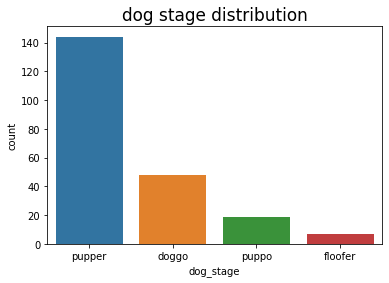

In [79]:
my_order = ['pupper','doggo','puppo','floofer']
sns.countplot(x='dog_stage', data=master_df, order=my_order)
plt.title('dog stage distribution', fontdict={'fontsize':17}, )

> the most commonly own dog according to the tweet is pupper and floofer is rarely own dog 

#### Question 2: What is the relationship between retweet count, favorite count, image number, and predictions of dog breed?

In [80]:
counts_corr = master_df[['retweet_count', 'favorite_count', 'p1_conf','img_num']].corr()
counts_corr

,retweet_count,favorite_count,p1_conf,img_num
retweet_count,1.000000,0.910912,0.051678,0.091592
favorite_count,0.910912,1.000000,0.076375,0.127545
p1_conf,0.051678,0.076375,1.000000,0.202306
img_num,0.091592,0.127545,0.202306,1.000000


Text(0.5, 1.0, 'correlation heapmap between COUNTS, p1_conf, img_num')

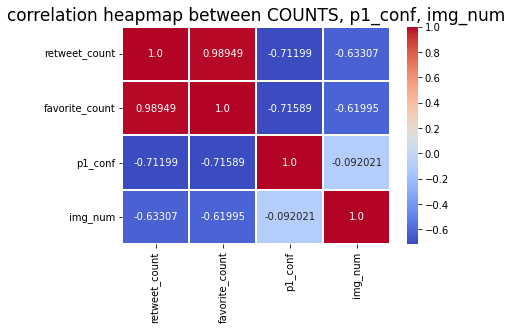

In [81]:
sns.heatmap(counts_corr.corr(), annot=True,fmt='.5',cmap='coolwarm', linewidths = '.1')
plt.title('correlation heapmap between COUNTS, p1_conf, img_num', fontdict={'fontsize':17})

> 1. favorite_count is strongly positively correlated with retweet_count
> 2. img_num and p1_conf are far less correlated
> 3. favorite_count and p1_conf are negatively correlated
> 4. retweet_count and p1_conf are negatively correlated
> 6. favorite_count and img_num are negatively correlated
> 7. retweet_count and img_num are negatively correlated
